In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
%matplotlib inline

In [3]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )

sms_raw = pd.read_csv(data_path, delimiter = '\t', header = None)
sms_raw.columns = ['spam', 'message']
sms_raw.head(20)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [7]:
print (sms_raw.head())

   spam                                            message  click  offer  \
0   ham  Go until jurong point, crazy.. Available only ...  False  False   
1   ham                      Ok lar... Joking wif u oni...  False  False   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  False  False   
3   ham  U dun say so early hor... U c already then say...  False  False   
4   ham  Nah I don't think he goes to usf, he lives aro...  False  False   

   winner    buy   free   cash  urgent  allcaps  
0   False  False  False  False   False    False  
1   False  False  False  False   False    False  
2   False  False  False  False   False    False  
3   False  False  False  False   False    False  
4   False  False  False  False   False    False  


In [8]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

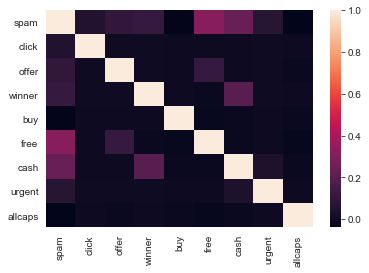

In [9]:
sns.set_style('white')
sns.heatmap(sms_raw.corr())

In [10]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [12]:
print(data.shape[0])

5572


In [13]:
print(((1-(target != y_pred).sum()/data.shape[0]))*100)

89.16008614501077


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

In [15]:
print ((target!=y_pred).sum())

604


In [16]:
print(4770+549+198+55)

5572


In [17]:
#manual calculation of confusion matrix
False_neg = 0
False_pos = 0

for key in keywords:
    for each in sms_raw[str(key)]:
        for every in sms_raw['spam']:
            if each == False and every == 'spam':
                False_neg = False_neg + 1
         
        
print (False_neg)


0


In [18]:
print (y_pred)

[False False False ... False False False]


In [21]:
#add for loop to iterate over df
predicted = True
actual = False

tp = 0
fn = 0
fp = 0
tn = 0


if predicted == True and actual == True:
    tp = tp + 1
elif predicted == False and actual == True:
    fn = fn + 1
elif predicted == True and actual == False:
    fp = fp + 1 
else:
    tn = tn + 1
print(tp)
print (fn)
print (fp)
print (tn)

0
0
1
0


In [63]:
# Test your model with different holdout groups.
#Version 1

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [64]:
#Version 1
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

In [22]:
#Version 2

keywords = ['click', 'offer', 'winner', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [23]:
#Version 2 [worse than version 1]
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8663677130044843
Testing on Sample: 0.8779612347451543


In [24]:
#Version 2 [worse than version 1]
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.87634409, 0.88530466, 0.87275986, 0.88172043, 0.87992832,
       0.87791741, 0.87432675, 0.8794964 , 0.87410072, 0.87769784])

In [26]:
#Version 3
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'trip', 'save']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [27]:
#Version 3 (Better than version 1)
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [28]:
#Version 3 (Better than version 1)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

## Best version includes keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'trip', 'save']. None of these seem to overfit. Having more examples of spam may be a key factor in helping the model identify spam. Removing and adding terms did not seem to have a significant effect though.

In [29]:
#Version 4
keywords = ['winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [30]:
#Version 4 (Better than 2, worse than 1 and 3)
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8834080717488789
Testing on Sample: 0.8908829863603733


In [31]:
#Version 4
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.890681  , 0.89605735, 0.88888889, 0.89426523,
       0.89048474, 0.87971275, 0.89028777, 0.88489209, 0.89568345])

In [32]:
#Version 5
keywords = ['winner', 'buy', 'free', 'cash', 'save', 'trip']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [33]:
#Version 5
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8834080717488789
Testing on Sample: 0.8903445800430725


In [34]:
#Version 5 (Still not as good as version 3)
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.890681  , 0.89605735, 0.88888889, 0.89247312,
       0.88868941, 0.87971275, 0.88848921, 0.88489209, 0.89568345])